# U.S. Medical Insurance Costs

The goal of this project is to explore a CSV file containing medical insurance costs using Python. Our objective is to analyze the attributes present in 'insurance.csv' in order to gain insights into patient information and identify potential use cases for the dataset. Through this exploration, we aim to develop foundational programming skills in Python for the purpose of performing exploratory data analysis.

In this project, we will:

- Calculate both the average and median ages of the patients within the dataset. We will also visualize the age distribution using a histogram to better understand the age demographics.

- Investigate the geographical distribution of the dataset by analyzing the regions from which the majority of individuals come. A bar chart will be used to visualize this distribution.

- Examine the disparity in costs between smokers and non-smokers, shedding light on potential cost differences based on smoking status.

- Demonstrate proficiency in data manipulation by storing patient information in both a dictionary and a Pandas DataFrame. This will provide hands-on experience in working with data structures commonly used in data analysis.

Throughout the project, we will engage in data-driven exploration and visualization, honing our skills in Python programming while gaining valuable insights into the medical insurance dataset.



While the focus of this project is on leveraging Python for data analysis, we will also harness the power of commonly used libraries that seamlessly integrate with Python for efficient data handling. To begin our analysis, we will import these libraries.

We will utilize the CSV library to interact with the 'insurance.csv' dataset, Matplotlib to create visually informative representations of our data, and Pandas to facilitate the storage of patient information within a Pandas DataFrame.

In [120]:
#import CSV library
import csv
#import Matplotlib library
import matplotlib.pyplot as plt
#inport Pandas library
import pandas as pd

Looking at the CSV file we notice that there are columns for:
- age of patient
- sex of patient
- the patients bmi
- the number of children the patient has 
- whether the patient is a smoker or non-smoker
- the region of the U.S. that the patient lives in
- the patients yearly cost of medical insurance

We can start by creating empty lists to store the values of each column

In [121]:
#initialize emty lists for storing column values
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

Next we will create a helper function called `load_column_data` to load in the data from the CSV file's columns into the lists. 

In [122]:
def load_column_data(data_list, csv_file, column_name, data_type=str):
    # Open the CSV file
    with open(csv_file) as csv_info:
        # Read the data from the CSV file
        csv_dict = csv.DictReader(csv_info)

        # Loop through each row in the CSV
        for row in csv_dict:
            # Convert the data to the specified data type
            converted_data = data_type(row[column_name])
            
            # Add the converted data to the list
            data_list.append(converted_data)

    # Return the list of data
    return data_list

Using the above helper function we can now call it repeatedly to load the data from the columns in insurances.csv to the empty lists

In [ ]:
#each line will load data from it's respective column into a list
load_column_data(age, 'insurance.csv', 'age', int)
load_column_data(sex, 'insurance.csv', 'sex')
load_column_data(bmi, 'insurance.csv', 'bmi', float)
load_column_data(children, 'insurance.csv', 'children', int)
load_column_data(smoker, 'insurance.csv', 'smoker')
load_column_data(region, 'insurance.csv', 'region')
load_column_data(charges, 'insurance.csv', 'charges', float)

Now that we have loaded the columns into the lists we can begin working with the data.

## Finding the average and median age of patients within the dataset and graphing the age distribution

We can find the average age of patients by finding the sum of the ages in our `age` list and dividing by the number of patients, we can find the median by sorting the list by age and finding the value that is in the middle of the distribution. We can then graph the age distribution to visualize the frequency of different ages spread throughout the dataset.

We will create a function `find_average_age` to find the average.

In [124]:
def find_average_age(age):
    #firstly we will find the average age 
    # Initialize a variable to store the sum of ages
    avg_age = 0 

    # Iterate through each age in the provided list
    for i in range(len(age)):
        # Add the current age to the sum
        avg_age += int(age[i])
    
    # Calculate the actual average by dividing the sum by the number of ages
    avg_age /= len(age)
    
    # Print out the calculated average age in a user-friendly message
    print(f"The average age of patients in the dataset is {int(avg_age)}.")

We will next create the function `find_median_age` to find the median age in the dataset.

In [125]:
def find_median_age(age):
    sorted_ages = sorted(age)
    n = len(sorted_ages)
    
    if n % 2 == 0:
        middle1 = n // 2
        middle2 = middle1 - 1
        median = (sorted_ages[middle1] + sorted_ages[middle2]) / 2
    else:
        middle = n // 2
        median = sorted_ages[middle]
    
    print(f"The median age of patients in the dataset is {int(median)}")


Finally, we will create a function `graph_ages` to create a graph using matplotlib to visualize the distribution of different ages within the dataset

In [126]:
def graph_ages(age):
    # Create a histogram to visualize the age range
    # Define the range of ages
    age_range = range(min(age), max(age) + 1)  
    # Use the age_range as bins
    plt.hist(age, bins=age_range, edgecolor='black')  
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.title("Age Distribution of Patients")
    plt.show()

The average age of patients in the dataset is 39.
The median age of patients in the dataset is 39


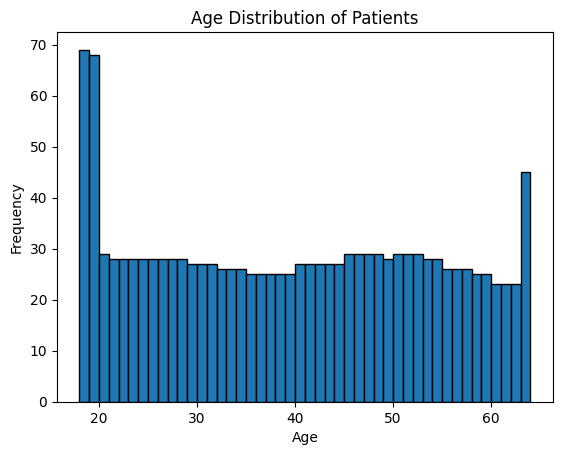

In [127]:
find_average_age(age)
find_median_age(age)
graph_ages(age)

### What's does this mean? 
We have determined that both the average and median ages within the dataset are 39 years old. This information is significant as it underscores the absence of bias towards either older or younger ages. For instance, an average of 14 or 75 would imply a concentration of either young or elderly patients. In contrast, an average of 39 serves as a reassuring indication that the dataset encompasses a diverse range of ages within the population.

The histogram reinforces this observation by presenting additional context. While notable peaks are evident at ages 18, 19, and 64, it's intriguing to observe that the dataset's age range spans from 18 to 64. This comprehensive range effectively represents the spectrum of patient ages in the dataset. Remarkably, the midpoint of this range, which is 41, closely aligns with the dataset's average age of 39. Examining both the mean and median ages provides a deeper understanding of the age distribution's central tendency.

Collectively, these insights underscore that the dataset captures a diverse representation of patient ages. The presence of localized peaks at specific ages does not undermine this broader representation. It's important to note that while this finding is valuable, it's essential to remain aware of potential biases that might exist

## Finding out where the majority of patients are from

To discover this we must take all regions in the dataset, quantify them, and find the *mode* of this column as well as visualize it using a bar chart.

We can do this by creating a helper function that will count the amount of times a region appears in the `column` list, it will return the region that appears the most frequently.

Most patients are from the southeastern region of the US.


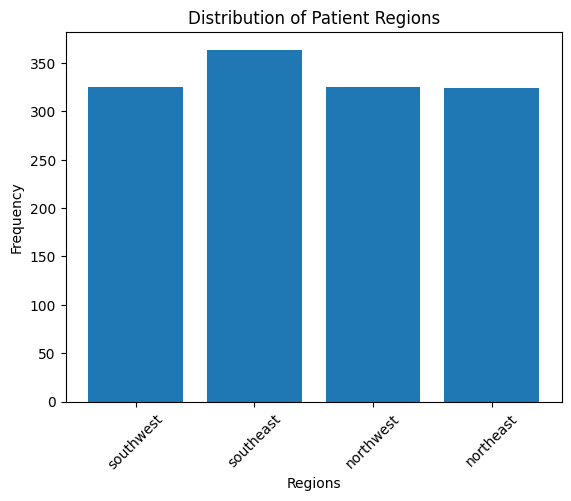

In [128]:
def region_mode(region):
    mode = ""
    most = 0
    # Initialize a dictionary to store region frequencies
    region_count = {}  
    for i in region:
        count = 0
        for j in region:
            if i == j:
                count += 1
        
        if count > most:
            most = count
            mode = i
        
        # Update the region count dictionary
        region_count[i] = count
    
    print(f"Most patients are from the {mode}ern region of the US.")
    
    # Create a bar chart to visualize region frequencies
    plt.bar(region_count.keys(), region_count.values())
    plt.xlabel("Regions")
    plt.ylabel("Frequency")
    plt.title("Distribution of Patient Regions")
    plt.xticks(rotation=45)
    plt.show()

region_mode(region)

### What's the point of finding the most common region?

It appears that most patients are from the southeastern United States, and our bar chart supports this finding. This gives us a better understanding of the geographic distribution of our dataset and where the patients live. This can assist in: 
- Finding where healthcare providers should allocate medical resources effectively 
- Allowing insurance companies to adjust premiums based on geographical location
- Highlighting potential healthcare disparities between regions

## Looking at the difference in cost between smokers and non-smokers

In [129]:
def smoking_difference(smoker, charges):
    # Initialize variables to track total charges for smokers and non-smokers
    total_charges_smoker = 0
    total_charges_non_smoker = 0

    # Loop through the 'smoker' and 'charges' data using zip
    for is_smoker, charge in zip(smoker, charges):
        if is_smoker == "yes":
            total_charges_smoker += float(charge)
        if is_smoker == "no":
            total_charges_non_smoker += float(charge)

    # Calculate the difference in costs between smokers and non-smokers
    cost_difference = round(total_charges_smoker - total_charges_non_smoker, 2)

    # Provide a user-friendly explanation of the result
    if cost_difference > 0:
        print(f"Smokers, on average, have higher yearly medical costs compared to non-smokers by ${cost_difference}.")
    elif cost_difference < 0:
        print(f"Non-smokers, on average, have lower yearly medical costs compared to smokers by ${abs(cost_difference)}.")
    else:
        print("There is no significant difference in yearly medical costs between smokers and non-smokers.")

smoking_difference(smoker, charges)

Non-smokers, on average, have lower yearly medical costs compared to smokers by $192297.95.


### Why is there such a large difference?
It's evident that non-smokers generally incur lower annual medical costs compared to smokers. This discrepancy arises from higher health risks associated with smoking, including respiratory conditions, lung cancer, and heart disease. Smokers typically face increased medical expenses due to these health conditions. Moreover, higher insurance costs can serve as a financial incentive for smokers to consider quitting the habit.

## Creating a dictionary to store patient information

We will now establish a dictionary to organize and store patient information. Utilizing a dictionary for the dataset's information offers a streamlined approach to access, manipulate, and analyze data in the future. This structured arrangement enhances data management and enables efficient exploration. 

In [130]:
def create_dict(age, sex, bmi, children, smoker, region, charges):
    # Initialize an empty dictionary to store medical records
    medical_records = {}
    
    # Create key-value pairs in the dictionary for each attribute
    # Convert 'age' to a list of integers
    medical_records["age"] = [int(a) for a in age]
    
    # Copy other attributes as they are
    medical_records["sex"] = [s for s in sex]
    medical_records["bmi"] = [b for b in bmi]
    medical_records["children"] = [c for c in children]
    medical_records["smoker"] = [s for s in smoker]
    medical_records["regions"] = [r for r in region]
    medical_records["charges"] = [c for c in charges]
    
    # Return the populated medical records dictionary
    return medical_records

In [ ]:
#initialize a variable to store the dictionary and call create_dict
medical_dictionary = create_dict(age, sex, bmi, children, smoker, region, charges)

# Print the resulting medical dictionary
print(medical_dictionary)

Now the data from each column is neatly stored in a single dictionary!

## Storing Patient info into a Pandas DataFrame

While we've successfully stored the data in a dictionary, the dictionary format might not be as reader-friendly. To enhance readability and allow more structured analysis, we'll leverage the power of the Pandas library to organize the patient information into a DataFrame. This tabular format allocates a dedicated index to each patient, further simplifying data access and manipulation. Achieving this is straightforward using the pandas.DataFrame.from_dict() function.

In [133]:
#store the data from the dictionary created earlier and transfer it into a DataFrame
medical_dataframe = pd.DataFrame.from_dict(medical_dictionary)

#print the DataFrame
print(medical_dataframe)


      age     sex     bmi  children smoker    regions      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Notice how the patient data is much easier to read now!

### Thank you for taking the time to look through this project!